In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [7]:
data = np.loadtxt("C:\\Master_Projekt\\ai_input2.txt")

In [8]:
X = data[:, :-1]  # Features
y = data[:, -1]  # Target variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [12]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= 1600.5 else to node 2.
	node=1 is a split node: go to node 3 if X[:, 3] <= 2436.0 else to node 4.
	node=2 is a leaf node.
		node=3 is a leaf node.
		node=4 is a leaf node.


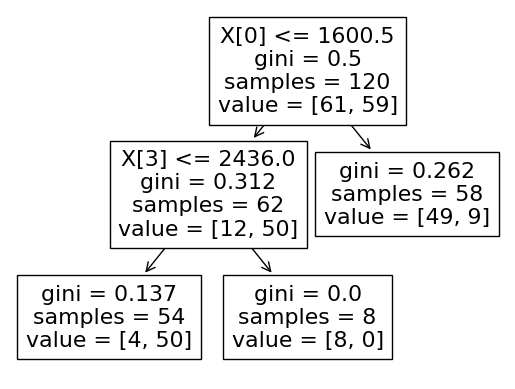

In [7]:
tree.plot_tree(clf)
plt.show()

In [8]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [9]:
row1 = [[1642.0,13645.0,2845.4867,2220.0,2084.0,2017684.7791010202,1420.3812905776779,1420.4523149690806,691.5]]
row2 = [[1651.0,6485.0,2133.5005,2099.0,2075.0,47119.57435718572,217.05958260291112,217.07043639608256,276.0]]
row3 = [[1661.0,7186.0,2130.8205,2098.0,2039.0,45066.76935668567,212.27873817165485,212.28935290467507,273.0]]
row4 = [[1528.0,14528.0,2095.4517,2011.5,1896.0,253486.37050416044,503.44912540107765,503.4742997454393,332.0]]
row5 = [[1496.0,25048.0,2107.5791,1979.0,1842.0,289298.068350025,537.8374648006496,537.8643586909482,373.5]]
row6 = [[1549.0,5875.0,2098.9139,2018.0,1918.0,103383.1722040104,321.5164597447384,321.53253677351285,341.0]]
row17 = [[1540.0,28141.0,2114.9409,1996.0,1837.0,316266.49585677567,562.3476408834574,562.375760374481,350.0]]
row18 = [[1540.0,8239.0,2104.7403,2025.0,1906.0,113218.20487639763,336.46230554983424,336.4791299269505,333.5]]
row19 = [[1536.0,10228.0,2144.3379,2092.0,2068.0,79810.14633822381,282.4927703917217,282.50689608967747,292.0]]
row20 = [[1555.0,14932.0,2091.1211,2039.0,1887.0,88514.73490828082,297.4993839233789,297.5142600082907,303.0]]
row7 = [[1513.0,26264.0,2873.137,2167.0,1869.0,2822719.3587668766,1680.011037711062,1680.0950445635142,879.0]]
row8 = [[1592.0,20137.0,2984.9971,2216.5,2145.0,2973507.1472063106,1724.2997989014525,1724.386020358061,1432.5]]
row9 = [[1542.0,23370.0,2947.6204,2206.0,1861.0,2954943.788882728,1718.9090419518539,1718.9949938503976,1114.0]]
row10 = [[1580.0,23842.0,2943.4652,2196.0,1908.0,2970602.8674757075,1723.4575153420406,1723.543694681312,1148.0]]
row11 = [[1586.0,18116.0,2999.9235,2209.0,2220.0,2874318.6987176216,1695.296807891689,1695.3815790899764,1998.5]]
row12 = [[1565.0,26771.0,2989.5021,2212.0,1866.0,3009367.5815537455,1734.6661479361353,1734.7528877490724,1815.5]]
row13 = [[1577.0,15075.0,2425.0778,2188.0,2128.0,586021.317878948,765.482015299615,765.5202922711768,521.0]]
row14 = [[1477.0,13061.0,2423.8555,2229.0,2113.0,475466.05642539257,689.5059896909888,689.5404675763364,572.0]]
row15 = [[1595.0,10839.0,2889.7134,2423.0,2123.0,1070308.1542758676,1034.5052554049398,1034.5569845474283,1767.5]]
row16 = [[1526.0,15661.0,2417.1411,2183.0,2119.0,562937.4443352235,750.2540573637639,750.2915728803193,501.5]]

In [10]:
print('sichere Validierungsdaten 0')
yhat = clf.predict(row1)
print('Predicted Class1 : %d' % yhat[0])
yhat = clf.predict(row2)
print('Predicted Class2 : %d' % yhat[0])
yhat = clf.predict(row3)
print('Predicted Class3 : %d' % yhat[0])
yhat = clf.predict(row4)
print('Predicted Class4 : %d' % yhat[0])
yhat = clf.predict(row5)
print('Predicted Class5 : %d' % yhat[0])
yhat = clf.predict(row6)
print('Predicted Class6 : %d' % yhat[0])
yhat = clf.predict(row17)
print('Predicted Class17: %d' % yhat[0])
yhat = clf.predict(row18)
print('Predicted Class18: %d' % yhat[0])
yhat = clf.predict(row19)
print('Predicted Class19: %d' % yhat[0])
yhat = clf.predict(row20)
print('Predicted Class20: %d' % yhat[0])
print('------------------------------')
print('unsichere Validierungsdaten 1')
yhat = clf.predict(row7)
print('Predicted Class7 : %d' % yhat[0])
yhat = clf.predict(row8)
print('Predicted Class8 : %d' % yhat[0])
yhat = clf.predict(row9)
print('Predicted Class9 : %d' % yhat[0])
yhat = clf.predict(row10)
print('Predicted Class10: %d' % yhat[0])
yhat = clf.predict(row11)
print('Predicted Class11: %d' % yhat[0])
yhat = clf.predict(row12)
print('Predicted Class12: %d' % yhat[0])
yhat = clf.predict(row13)
print('Predicted Class13: %d' % yhat[0])
yhat = clf.predict(row14)
print('Predicted Class14: %d' % yhat[0])
yhat = clf.predict(row15)
print('Predicted Class15: %d' % yhat[0])
yhat = clf.predict(row16)
print('Predicted Class16: %d' % yhat[0])

sichere Validierungsdaten 0
Predicted Class1 : 0
Predicted Class2 : 0
Predicted Class3 : 0
Predicted Class4 : 1
Predicted Class5 : 1
Predicted Class6 : 1
Predicted Class17: 1
Predicted Class18: 1
Predicted Class19: 1
Predicted Class20: 1
------------------------------
unsichere Validierungsdaten 1
Predicted Class7 : 1
Predicted Class8 : 1
Predicted Class9 : 1
Predicted Class10: 1
Predicted Class11: 1
Predicted Class12: 1
Predicted Class13: 1
Predicted Class14: 1
Predicted Class15: 1
Predicted Class16: 1


In [11]:
outputreport = open(r"C:\Master_Projekt\decision_tree\classification_report.txt", "a")

In [12]:
cr=(classification_report(y_test,clf.predict(X_test)))

In [13]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79        19
         1.0       0.81      0.81      0.81        21

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



In [14]:
outputreport.write (cr)
outputreport.write ('\n')
outputreport.close()

In [15]:
#print ('1',clf.predict_proba(row1))
print ('4',clf.predict_proba(row4))
print ('5',clf.predict_proba(row5))
print ('6',clf.predict_proba(row6))
print ('17',clf.predict_proba(row17))
print ('18',clf.predict_proba(row18))
print ('19',clf.predict_proba(row19))
print ('20',clf.predict_proba(row20))

4 [[0.07407407 0.92592593]]
5 [[0.07407407 0.92592593]]
6 [[0.07407407 0.92592593]]
17 [[0.07407407 0.92592593]]
18 [[0.07407407 0.92592593]]
19 [[0.07407407 0.92592593]]
20 [[0.07407407 0.92592593]]
